**Ryanda Ladyka Pratiwi**

**Data Science Project III - Data Science Batch 18**

# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Taiwan (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [2]:
# Ini untuk upload data dari local ke google colab di section
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Session 24 - Real estate valuation data set.xlsx to Session 24 - Real estate valuation data set.xlsx
User uploaded file "Session 24 - Real estate valuation data set.xlsx" with length 32717 bytes


In [3]:
# df = pd.read_csv("/content/drive/My Drive/Digital_Skola/real_estate.csv") #colab
df = pd.read_excel('/content/Session 24 - Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df.shape

(414, 8)

In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
df.drop('No', inplace = True, axis=1)

In [8]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
df.rename(columns={'X1 transaction date':'X1', 'X2 house age':'X2', 'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [10]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

**2.1 Gambarkan keadaan dari harga rumah pada variabel (House price of unit are)**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

**a.) Gambaran statistik deskriptif**

In [12]:
df.Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari data harga rumah tersebut diketahui bahwa harga rata-rata ruma sebesar 37.98 dengan harga terendah 7.6 dan harga tertingginya 117.5. Harga rata-rata (37.98) dan median (38.45) tidak jauh berbeda sehingga distribusi harganya menyebar normal

---

**b.) Sebaran harga rumah**

Dicek menggunakan statistical plot, apa key takeaway / insight yang bisa diambil? **Q1**

In [13]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

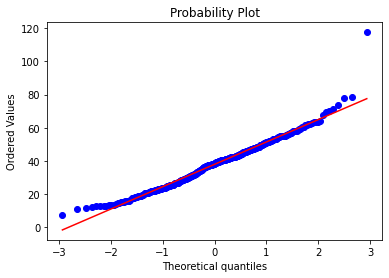

In [14]:
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

# QQ-Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of House Price')

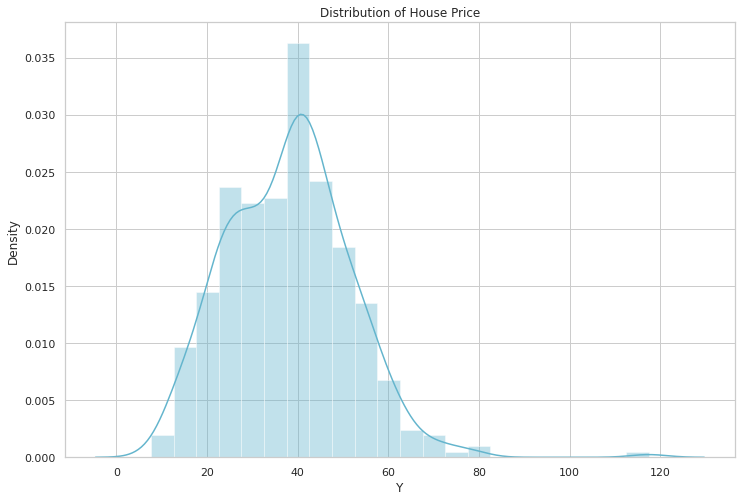

In [15]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['Y'], kde = True, color = 'c')
plt.title('Distribution of House Price')

**Answer Q1**: QQ Plot digunakan untuk membandingkan antar dua distribusi probabilitas dengan menggambarkan masing-masing quantile secara berlawanan. Terlihat dari qq-plot menunjukan linearitas plot yang berada di line y = x, maka kedua quantile memiliki kemiripan yang artinya sebaran data berdistribusi normal.

---


**c.) Apakah ada outlier pada variabel harga rumah? Jika ada, nilainya berapa saja? Q2**

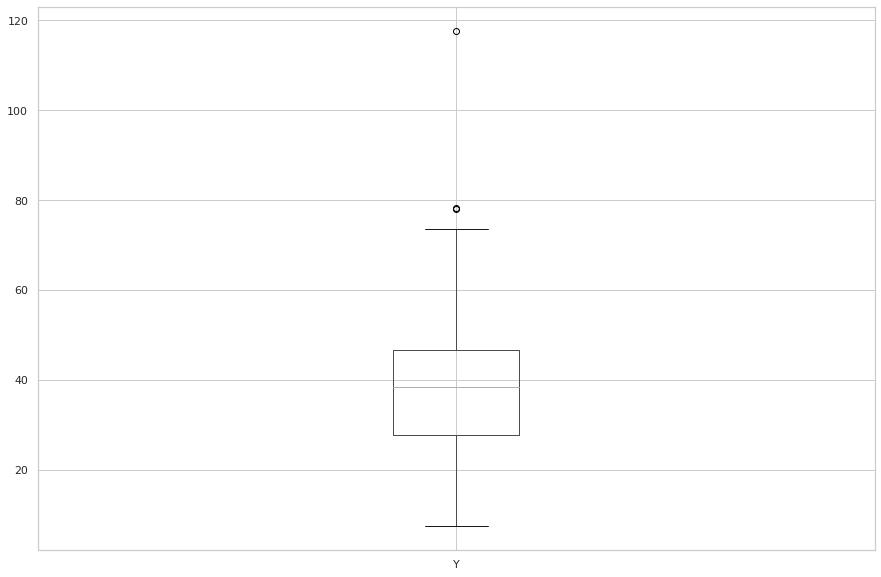

In [16]:
df[['Y']].boxplot(figsize=(15,10))

In [17]:
max_threshold = df['Y'].quantile(0.995)
max_threshold

77.71400000000001

In [18]:
df[df['Y'] > max_threshold]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583333,35.4,318.5292,9,24.97071,121.54069,78.0


**Answer Q2**: Dari boxplot menunjukan adanya outlier yang mendekati nilai 80 dan 120. Dengan membandingkan data Y lebih besar dari quantile-nya sebesar 99.5%, kita mendapatkan list data outlier yaitu Y = 78.0 ; 78.3 ; 117.5

---

**d.) Variabel yang berkorelasi dengan harga rumah? Seberapa erat hubungannya? Q3**

Note: Korelasi > 0.5, baik minus maupun plus --> ada hubungan erat antar variabel

Korelasi < 0.5 --> tidak ada hubungan erat antar variabel

In [19]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Dari analisis korelasi dapat diketahui bahwa jarak stasiun MRT (X3) adalah -0.67, banyaknya convenience store (X4) adalah 0.57, dan letak lokasi longitude dan latitude (X5 & X6) adalah masing-masing 0.546 dan 0.523 mempengaruhi harga rumah.

**Answer Q3**: Interpretasi


*   Jika nilai X3 naik sebesar 1, maka nilai Y menurun sebesar 0.67
*   Jika nilai X4 naik sebesar 1, maka nilai Y naik sebesar 0.57
*   Jika nilai X5 naik sebesar 1, maka nilai Y naik sebesar 0.546
*   Jika nilai X6 naik sebesar 1, maka nilai Y naik sebesar 0.523

---

## Perbandingan Korelasi antara Variabel

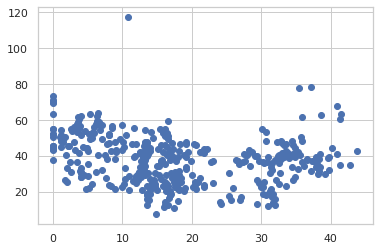

In [20]:
# House age vs House Price
plt.scatter(df['X2'], df['Y'])    # Tidak terlalu berkorelasi

*Q3: Apa yang bisa disimpulkan dari plot ini?*

Answer:

Dari plot tidak menunjukan kecondongan naik atau turunnya plot, bahkan cenderung mendatar (horizontal), sehingga dapat disimpulkan kedua variabel tidak menunjukan korelasi yang kuat.

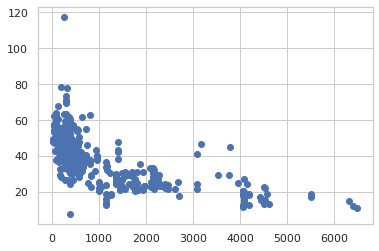

In [21]:
# Distance to nearest MRT Station vs House Price
plt.scatter(df['X3'], df['Y'])

*Q4: Kesimpulan dari plot ini?*

Answer:

Dari nilai data yang tertinggi hingga terendah dari kiri ke kanan menunjukan penurunan. Artinya adanya korelasi negatif antara X3 dan Y.

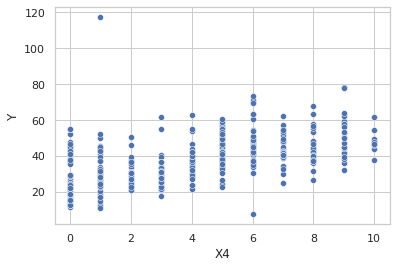

In [22]:
# Total Convenience Store (X4) vs House Price (Y)
sns.scatterplot(x='X4', y='Y', data=df)

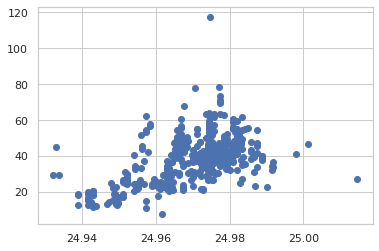

In [23]:
# Latitude (X5) vs House Price (Y)
plt.scatter(df['X5'], df['Y'])

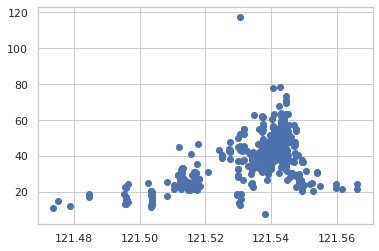

In [24]:
# Total Longitude (X6) vs House Price (Y)
plt.scatter(df['X6'], df['Y'])

**Answer Q5**: Dari ketiga plot menunjukan adanya korelasi positif

---

# 3. Pre-Processing

## Feature Engineering

**Check Multikolinearitas**

Text(0.5, 1.0, 'Correlation matrix antara variable X')

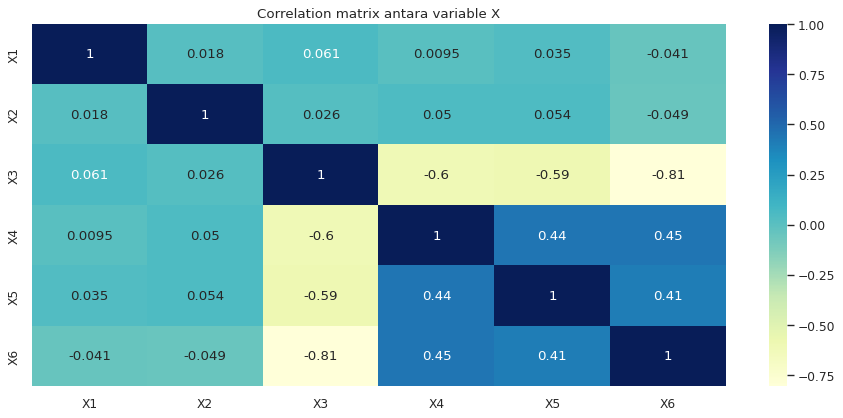

In [25]:
fig,ax = plt.subplots(figsize=(14,6), dpi=80)
sns.heatmap(df.loc[:,'X1':'X6'].corr(),cmap="YlGnBu", annot=True)
plt.title("Correlation matrix antara variable X")

Kesimpulan: Adanya multikolinearitas antara X3 dan X6 (-0.81). Agar menghindari ketimpangan (karena hubungan korelasi X3 dan X6 lebih tinggi dari pada terhadap Y), maka *X6 tidak dimasukan ke dalam model*.

(Parameter Keputusan: dilihat dari koefisien korelasi antara 2 variabel X tersebut dengan variabel Y, mana koefisien relasi yang lebih tinggi dengan variabel Y, maka variabel itu yang akan dipertahankan.)

---

## Check Null Values

In [26]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Tidak ada null values

In [27]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

# 4. Create Model and Evaluation

**Menentukan variabel X dan Y**

In [28]:
X = df.loc[:, 'X3':'X5']

In [29]:
y = pd.DataFrame(df['Y'])

In [30]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [31]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


## Splitting Train-Test datasets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Feature Scalling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [34]:
np.set_printoptions(suppress=True)
print(X_train[:10])

[[ 0.3064008  -1.05938075 -1.44352411]
 [-0.62892571  1.35417401  0.37069143]
 [ 0.26708915 -1.40417428  1.37197532]
 [-0.71737543 -1.05938075  0.39189125]
 [-0.78684647  2.04376109  1.14937719]
 [-0.80787845  1.00938048 -0.93472838]
 [-0.78081879  1.69896755  0.44244467]
 [-0.53283185 -0.02500014  1.17057701]
 [-0.35637818  1.00938048  0.85013355]
 [ 0.88716511 -0.36979367 -0.46344003]]


In [35]:
print(y_train[:10])

[[-0.81472663]
 [ 1.82714331]
 [ 0.71362788]
 [-0.64733542]
 [ 0.61173758]
 [ 1.1139112 ]
 [ 1.05568817]
 [-0.22521846]
 [ 0.15323123]
 [-1.12039753]]


## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [37]:
yPred = sc.inverse_transform(linReg.predict((X_train)))
yPred_train = pd.DataFrame(yPred)
yPred_train

,0
0,29.767456
1,46.697781
2,35.943835
3,40.225534
4,51.545412
...,...
326,42.590019
327,45.209746
328,38.986393
329,40.225534


### MSE

In [38]:
from sklearn.metrics import mean_squared_error
mse_linReg = mean_squared_error(sc.inverse_transform(y_train),yPred).round(2)
print("MSE: %.2f" % mse_linReg)

MSE: 96.23


### MAE

In [39]:
from sklearn.metrics import mean_absolute_error
mae_linReg = mean_absolute_error(sc.inverse_transform(y_train),yPred).round(2)
mae_linReg

6.98

### R-Squared

In [40]:
from sklearn.metrics import r2_score
r2_linReg = r2_score(sc.inverse_transform(y_train),yPred).round(2)
r2_linReg

0.49

Model regresi ini hanya dapat menjelaskan 51% Keragaman datanya. Model regresi yang baik jika r2 > 75%

## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5, )
Ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [42]:
yPred_R = sc.inverse_transform(Ridge.predict((X_train)))
yPred_R_tr = pd.DataFrame(yPred_R)
yPred_R_tr

,0
0,29.766143
1,46.693214
2,35.948764
3,40.217683
4,51.541750
...,...
326,42.593122
327,45.209430
328,38.978464
329,40.217683


### MSE

In [43]:
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(sc.inverse_transform(y_train),yPred_R).round(2)
mse_ridge

96.23

### MAE

In [44]:
from sklearn.metrics import mean_absolute_error
mae_R = mean_absolute_error(sc.inverse_transform(y_train),yPred_R).round(2)
mae_R

6.98

### R-Squared

In [45]:
from sklearn.metrics import r2_score
r2_R = r2_score(sc.inverse_transform(y_train),yPred_R)
r2_R

0.49031717626520566

## Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor(n_estimators= 100,random_state=1)
RFReg.fit(X_train, y_train)

<ipython-input-46-f8a23723d9a6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [47]:
# Untuk prediksi data training
yPredTr_RF = RFReg.predict(X_train)

# Untuk prediksi data test
# yPredTs_RF = RFReg.predict(X_test)

In [48]:
yPred_RF_tr = pd.DataFrame(yPredTr_RF)
yPred_RF_tr

,0
0,-0.849902
1,1.347561
2,0.542920
3,-0.330066
4,0.523829
...,...
326,0.050117
327,0.679774
328,-0.452453
329,-0.330066


### MSE

In [49]:
# MSE Data Training Random Forest
yPredTr_RF = RFReg.predict(X_train)

mse_RF_tr = mean_squared_error(sc.inverse_transform(y_train), yPredTr_RF).round(3)
mse_RF_tr

1624.13

### MAE

In [50]:
mae_RF_tr = mean_absolute_error(y_train, yPredTr_RF).round(3)
mae_RF_tr

0.189

### R-Squared

In [51]:
# R-Squared for Random Forest
from sklearn.metrics import r2_score
r2_RF = r2_score(y_train, yPredTr_RF).round(3)
r2_RF

0.924

## SVR

In [52]:
from sklearn.svm import SVR

svr = SVR().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# Untuk prediksi data training
svr_pred_tr = svr.predict(X_train)

# Untuk prediksi data test
svr_pred_ts = svr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [54]:
svrPred = pd.DataFrame(svr_pred_tr)
svrPred

,0
0,-0.938394
1,0.550771
2,0.263641
3,0.416196
4,0.624909
...,...
326,0.031239
327,0.453232
328,0.016781
329,0.416196


### MSE

In [55]:
mse_svr_tr = mean_squared_error(y_train, svr_pred_tr).round(3)
mse_svr_tr

0.375

### MAE

In [56]:
mae_svr_tr = mean_absolute_error(y_train, svr_pred_tr).round(3)
mae_svr_tr

0.389

### R-Squared

In [57]:
r2_svr = r2_score(y_train, svr_pred_tr).round(3)
r2_svr

0.625

# 5. Model Comparison

In [58]:
data = np.array([['','R-Square','MSE','MAE'],
                 ['Linear Regression',r2_linReg, mse_linReg, mae_linReg],
                 ['Ridge',r2_R,mse_ridge,mae_R],
                 ['Random Forest',r2_RF,mse_RF_tr,mae_RF_tr],
                 ['SVR',r2_svr,mse_svr_tr,mae_svr_tr]])

In [59]:
data

array([['', 'R-Square', 'MSE', 'MAE'],
       ['Linear Regression', '0.49', '96.23', '6.98'],
       ['Ridge', '0.49031717626520566', '96.23', '6.98'],
       ['Random Forest', '0.924', '1624.13', '0.189'],
       ['SVR', '0.625', '0.375', '0.389']], dtype='<U32')

**Table Comparison**

In [60]:
table = pd.DataFrame(data= data[1:,1:],
                     index = data[1:,0],
                     columns = data[0,1:])

In [61]:
table

,R-Square,MSE,MAE
Linear Regression,0.49,96.23,6.98
Ridge,0.49031717626520566,96.23,6.98
Random Forest,0.924,1624.13,0.189
SVR,0.625,0.375,0.389


**Kesimpulan:**

**Dari keempat model, Random Forest menunjukan nilai R-Squared yang paling tinggi. Model Random Forest juga menunjukan model regresi yang baik karena bernilai 92.6% yang dimana lebih dari standard model regresi yang baik (>=75%).**

_________________________________________________________________________________________

**END OF CODE**